In [1]:
import pandas as pd
pd.options.display.max_columns = None

In [2]:
from nba_api.stats.endpoints import shotchartdetail

In [3]:
from nba_api.stats.static import teams
# get_teams returns a list of 30 dictionaries, each an NBA team.
nba_teams = teams.get_teams()
print('Number of teams fetched: {}'.format(len(nba_teams)))
nba_teams[:3]

Number of teams fetched: 30


[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [4]:
from nba_api.stats.static import players
# get_players returns a list of dictionaries, each representing a player.
nba_players = players.get_players()
print('Number of players fetched: {}'.format(len(nba_players)))
nba_players[:5]

Number of players fetched: 4501


[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False}]

In [5]:
lbj = [player for player in nba_players if player['first_name'] == 'LeBron'][0]
lbj

{'id': 2544,
 'full_name': 'LeBron James',
 'first_name': 'LeBron',
 'last_name': 'James',
 'is_active': True}

In [6]:
lakers = [team for team in nba_teams
         if team['full_name'] == 'Los Angeles Lakers'][0]
lakers

{'id': 1610612747,
 'full_name': 'Los Angeles Lakers',
 'abbreviation': 'LAL',
 'nickname': 'Lakers',
 'city': 'Los Angeles',
 'state': 'California',
 'year_founded': 1948}

## Let's look at the parameters we need for the endpoint shotchartdetail

### team_id and player_id is required
### season_type_all_star - (Regular Season)|(Pre Season)|(Playoffs)|(All Star)
### context_measure_simple - ((PTS)|(FGM)|(FGA)|(FG_PCT)|(FG3M)|(FG3A)|(FG3_PCT)|(PF)|(EFG_PCT)|(TS_PCT)|
### (PTS_FB)|(PTS_OFF_TOV)|(PTS_2ND_CHANCE)|(PF))
### season - default is 2019-20

In [60]:
lbj_shotchart = shotchartdetail.ShotChartDetail(team_id=1610612747, player_id=2544, season_type_all_star='Regular Season', season_nullable='2019-20', context_measure_simple="FGA")

In [61]:
lbj_shotchart_list = lbj_shotchart.get_data_frames()

In [62]:
lbj_shotchart_df = lbj_shotchart_list[0]
lbj_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900002,7,2544,LeBron James,1610612747,Los Angeles Lakers,1,11,47,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-9,23,1,1,20191022,LAC,LAL
1,Shot Chart Detail,0021900002,21,2544,LeBron James,1610612747,Los Angeles Lakers,1,10,5,Made Shot,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,14,-144,41,1,1,20191022,LAC,LAL
2,Shot Chart Detail,0021900002,59,2544,LeBron James,1610612747,Los Angeles Lakers,1,6,58,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-66,251,1,0,20191022,LAC,LAL
3,Shot Chart Detail,0021900002,129,2544,LeBron James,1610612747,Los Angeles Lakers,1,3,51,Missed Shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,10,5,109,1,0,20191022,LAC,LAL
4,Shot Chart Detail,0021900002,187,2544,LeBron James,1610612747,Los Angeles Lakers,2,10,48,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,29,220,190,1,1,20191022,LAC,LAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Shot Chart Detail,0021900968,532,2544,LeBron James,1610612747,Los Angeles Lakers,4,7,38,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,-11,260,1,0,20200310,LAL,BKN
1172,Shot Chart Detail,0021900968,570,2544,LeBron James,1610612747,Los Angeles Lakers,4,5,39,Made Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27,-5,270,1,1,20200310,LAL,BKN
1173,Shot Chart Detail,0021900968,614,2544,LeBron James,1610612747,Los Angeles Lakers,4,2,48,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27,43,274,1,0,20200310,LAL,BKN
1174,Shot Chart Detail,0021900968,624,2544,LeBron James,1610612747,Los Angeles Lakers,4,1,47,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,5,15,1,1,20200310,LAL,BKN


In [63]:
lbj_shotchart_df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

### Based on the column list above of the shotchart dataframe, the granularity of the data is:
### Game ID - Game Event ID - Player ID

### Get specific game_date - 2020, March 10

#### Note: When comparing the stats.nba.com entries with the entries from shot chart detail it seems there exists only made shots

In [64]:
lbj_shotchart_df[(lbj_shotchart_df['GAME_DATE'] == "20191022")]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900002,7,2544,LeBron James,1610612747,Los Angeles Lakers,1,11,47,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-9,23,1,1,20191022,LAC,LAL
1,Shot Chart Detail,0021900002,21,2544,LeBron James,1610612747,Los Angeles Lakers,1,10,5,Made Shot,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,14,-144,41,1,1,20191022,LAC,LAL
2,Shot Chart Detail,0021900002,59,2544,LeBron James,1610612747,Los Angeles Lakers,1,6,58,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-66,251,1,0,20191022,LAC,LAL
3,Shot Chart Detail,0021900002,129,2544,LeBron James,1610612747,Los Angeles Lakers,1,3,51,Missed Shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,10,5,109,1,0,20191022,LAC,LAL
4,Shot Chart Detail,0021900002,187,2544,LeBron James,1610612747,Los Angeles Lakers,2,10,48,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,29,220,190,1,1,20191022,LAC,LAL
5,Shot Chart Detail,0021900002,203,2544,LeBron James,1610612747,Los Angeles Lakers,2,9,33,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-77,17,1,0,20191022,LAC,LAL
6,Shot Chart Detail,0021900002,206,2544,LeBron James,1610612747,Los Angeles Lakers,2,9,2,Made Shot,Turnaround Hook Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-16,71,1,1,20191022,LAC,LAL
7,Shot Chart Detail,0021900002,214,2544,LeBron James,1610612747,Los Angeles Lakers,2,8,32,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-13,17,1,1,20191022,LAC,LAL
8,Shot Chart Detail,0021900002,289,2544,LeBron James,1610612747,Los Angeles Lakers,2,3,23,Missed Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-11,5,1,0,20191022,LAC,LAL
9,Shot Chart Detail,0021900002,315,2544,LeBron James,1610612747,Los Angeles Lakers,2,1,33,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,33,-188,283,1,0,20191022,LAC,LAL


## Let's create a function that returns the id of a player

In [65]:
from nba_api.stats.endpoints import playercareerstats

def get_player_shotchart(player_name, season_id):
    """
    Parameters
    ----------
    player_name: name of the player with Capital
    season_id: ex. 2012-13
    """
    
    # player dictionary
    nba_players = players.get_players()
    player_dict = [player for player in nba_players if player['full_name'] == player_name][0]
    
    # career df
    career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
    career_df = career.get_data_frames()[0]
    
    # team id during the season
    team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']
    
    # shotchardtdetail endpoint
    shotchart_df = shotchartdetail.ShotChartDetail(team_id=int(team_id), 
                                                   player_id=int(player_dict['id']), 
                                                   season_type_all_star='Regular Season', 
                                                   season_nullable=season_id,
                                                   context_measure_simple="FGA")
    
    return shotchart_df

### Let's get Stephen Curry's shots from last season

In [66]:
stephencurry_shotchart = get_player_shotchart('Stephen Curry', '2017-18')
stephencurry_shotchart_list = stephencurry_shotchart.get_data_frames()
stephencurry_shotchart_list

[             GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID    PLAYER_NAME  \
 0    Shot Chart Detail  0021700002             56     201939  Stephen Curry   
 1    Shot Chart Detail  0021700002            167     201939  Stephen Curry   
 2    Shot Chart Detail  0021700002            207     201939  Stephen Curry   
 3    Shot Chart Detail  0021700002            219     201939  Stephen Curry   
 4    Shot Chart Detail  0021700002            370     201939  Stephen Curry   
 ..                 ...         ...            ...        ...            ...   
 859  Shot Chart Detail  0021701087            373     201939  Stephen Curry   
 860  Shot Chart Detail  0021701087            392     201939  Stephen Curry   
 861  Shot Chart Detail  0021701087            417     201939  Stephen Curry   
 862  Shot Chart Detail  0021701087            431     201939  Stephen Curry   
 863  Shot Chart Detail  0021701087            453     201939  Stephen Curry   
 
         TEAM_ID              TEAM_NAM

In [67]:
stephencurry_shotchart_df = stephencurry_shotchart_list[0]
stephencurry_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700002,56,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,9,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,95,242,1,1,20171017,GSW,HOU
1,Shot Chart Detail,0021700002,167,201939,Stephen Curry,1610612744,Golden State Warriors,1,0,32,Missed Shot,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,13,129,43,1,0,20171017,GSW,HOU
2,Shot Chart Detail,0021700002,207,201939,Stephen Curry,1610612744,Golden State Warriors,2,9,14,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,20,10,1,0,20171017,GSW,HOU
3,Shot Chart Detail,0021700002,219,201939,Stephen Curry,1610612744,Golden State Warriors,2,8,15,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-127,239,1,0,20171017,GSW,HOU
4,Shot Chart Detail,0021700002,370,201939,Stephen Curry,1610612744,Golden State Warriors,3,11,13,Made Shot,Driving Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-13,14,1,1,20171017,GSW,HOU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Shot Chart Detail,0021701087,373,201939,Stephen Curry,1610612744,Golden State Warriors,3,9,32,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-145,112,1,1,20180323,GSW,ATL
860,Shot Chart Detail,0021701087,392,201939,Stephen Curry,1610612744,Golden State Warriors,3,7,56,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,18,27,1,0,20180323,GSW,ATL
861,Shot Chart Detail,0021701087,417,201939,Stephen Curry,1610612744,Golden State Warriors,3,5,53,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,59,257,1,1,20180323,GSW,ATL
862,Shot Chart Detail,0021701087,431,201939,Stephen Curry,1610612744,Golden State Warriors,3,4,30,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-7,32,1,1,20180323,GSW,ATL


### Import for Data Visualization

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle, Arc

sns.set_style('white')
sns.set_color_codes()

# Draw Court

In [71]:
def draw_court(ax=None, color="blue", lw=1, outer_lines=False):
    """Returns an axes with a basketball court drawn onto to it.
    This function draws a court based on the x and y-axis values that the NBA
    stats API provides for the shot chart data.  For example the center of the
    hoop is located at the (0,0) coordinate.  Twenty-two feet from the left of
    the center of the hoop in is represented by the (-220,0) coordinates.
    So one foot equals +/-10 units on the x and y-axis.
    Parameters
    ----------
    ax : Axes, optional
        The Axes object to plot the court onto.
    color : matplotlib color, optional
        The color of the court lines.
    lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If `True` it draws the out of bound lines in same style as the rest of
        the court.
    Returns
    -------
    ax : Axes
        The Axes object with the court on it.
    """
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [86]:
def shot_chart(data, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5),
               court_color="gray", court_lw=2, outer_lines=False,
               flip_court=False, ax=None,
               despine=False, **kwargs):
    """
    Returns an Axes object with player shots plotted.
    Parameters
    ----------
    x, y : strings or vector
        The x and y coordinates of the shots taken. They can be passed in as
        vectors (such as a pandas Series) or as columns from the pandas
        DataFrame passed into ``data``.
    a: 0 or 1, Miss or Make
    data : DataFrame, optional
        DataFrame containing shots where ``x`` and ``y`` represent the
        shot location coordinates.
    title : str, optional
        The title for the plot.
    color : matplotlib color, optional
        Color used to plot the shots
    cmap : matplotlib Colormap object or name, optional
        Colormap for the range of data values. If one isn't provided, the
        colormap is derived from the valuue passed to ``color``. Used for KDE
        and Hexbin plots.
    {x, y}lim : two-tuples, optional
        The axis limits of the plot.
    court_color : matplotlib color, optional
        The color of the court lines.
    court_lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If ``True`` the out of bound lines are drawn in as a matplotlib
        Rectangle.
    flip_court : boolean, optional
        If ``True`` orients the hoop towards the bottom of the plot.  Default
        is ``False``, which orients the court where the hoop is towards the top
        of the plot.
    ax : Axes, optional
        The Axes object to plot the court onto.
    despine : boolean, optional
        If ``True``, removes the spines.
    kwargs : key, value pairs
        Keyword arguments for matplotlib Collection properties or seaborn plots.
    Returns
    -------
     ax : Axes
        The Axes object with the shot chart plotted on it.
    """

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=court_color, lw=court_lw, outer_lines=outer_lines)

    # separate color by make or miss
    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']
    
    x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']
    
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=75,**kwargs)
    # plot missed shots
    ax.scatter(x_missed, y_missed, c='r', marker="x", s=75, **kwargs)

    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(court_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

### Let's change this function so it differentiates between makes and misses

# Shot Plot

In [87]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

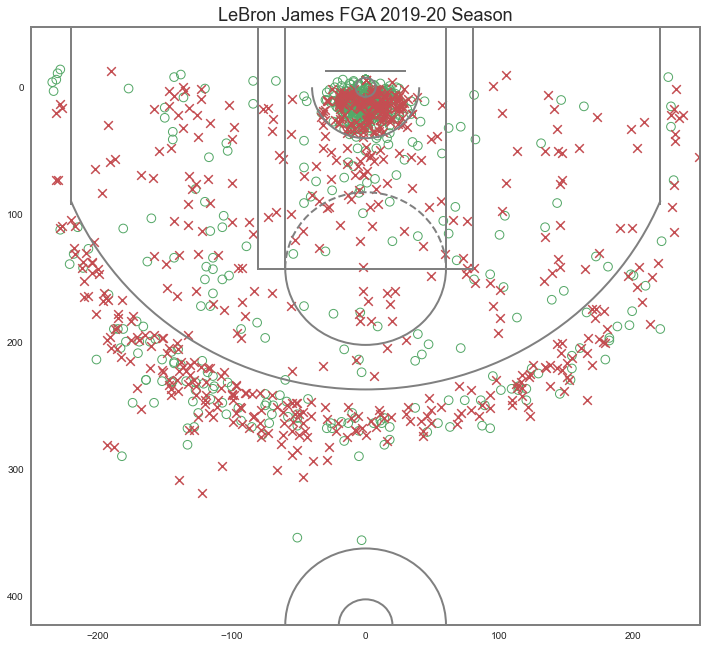

In [88]:
shot_chart(lbj_shotchart_df, color=lbj_shotchart_df["SHOT_MADE_FLAG"], title="LeBron James FGA 2019-20 Season")
plt.show()

# Hex Map

# Shot Zones

# Heat

# Stream
